Make sure you use the right version number.


In [4]:
# %pip install --upgrade scikit-learn==0.23.0

  Using cached scikit-learn-0.23.0.tar.gz (7.2 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


Once installed, we can load the data.


In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print(X)
print(y)
load_iris(as_frame=True).frame

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Next, we can apply models!


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([30.00384338, 25.02556238, 30.56759672])

In [ ]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([21.78, 22.9 , 25.36])

Maybe we should inspect the results.


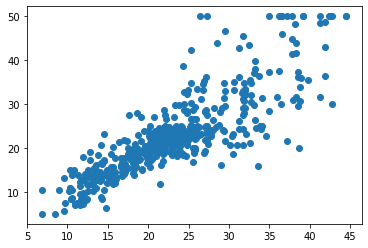

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

Let's put everything into a pipeline.


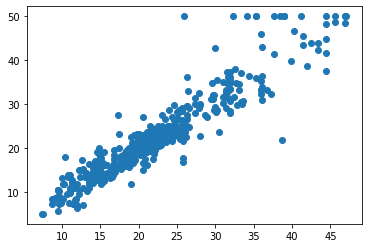

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

# 由 pipeline 定义的模型和正常的模型一模一样 (可以 fit 或者 predict)
pipe = Pipeline([("scale", StandardScaler()), ("model", KNeighborsRegressor())])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!


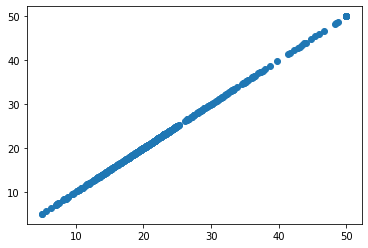

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline(
    [("scale", StandardScaler()), ("model", KNeighborsRegressor(n_neighbors=1))]
)
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!


In [ ]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(
    estimator=pipe,
    param_grid={"model__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    cv=3,
)
mod.fit(X, y);

训练完成的 mod 拥有几个 changing 的参数：

1. `cv_results_` 可以看到每个参数在不同 _metrics_ 的详细信息
2. `best_params_` 可以返回得到最优解的参数值
3. `best_estimator_` 可以返回训练好且使用最优参数的模型


In [ ]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001254,0.000084,0.001890,0.000178,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001168,0.000080,0.001864,0.000162,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001135,0.000084,0.001838,0.000103,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001118,0.000071,0.001947,0.000141,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001004,0.000062,0.001833,0.000083,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000872,0.000029,0.001508,0.000110,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001259,0.000337,0.001588,0.000111,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000838,0.000008,0.001636,0.000167,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000979,0.000148,0.001927,0.000287,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000927,0.000041,0.001772,0.000095,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


Finally, lets remember that we should look at the data.


In [ ]:
print(load_boston()["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 一些交叉验证函数

1. `cross_val_score`: 最常用的函数，用来直接算交叉验证得分
2. `cross_validate`: 更灵活，可以同时返回多种指标
3. `cross_val_predict`:不返回分数，而是返回交叉验证过程中每个样本的 预测值


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(max_iter=200)

scores = cross_val_score(clf, X, y, cv=5)  # 5折交叉验证
print(scores)  # 每折的准确率
print(scores.mean())  # 平均准确率


In [ ]:
from sklearn.model_selection import cross_validate

results = cross_validate(
    clf, X, y, cv=5, scoring=["accuracy", "f1_macro"], return_train_score=True
)
print(results)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(clf, X, y, cv=5)
print(confusion_matrix(y, y_pred))


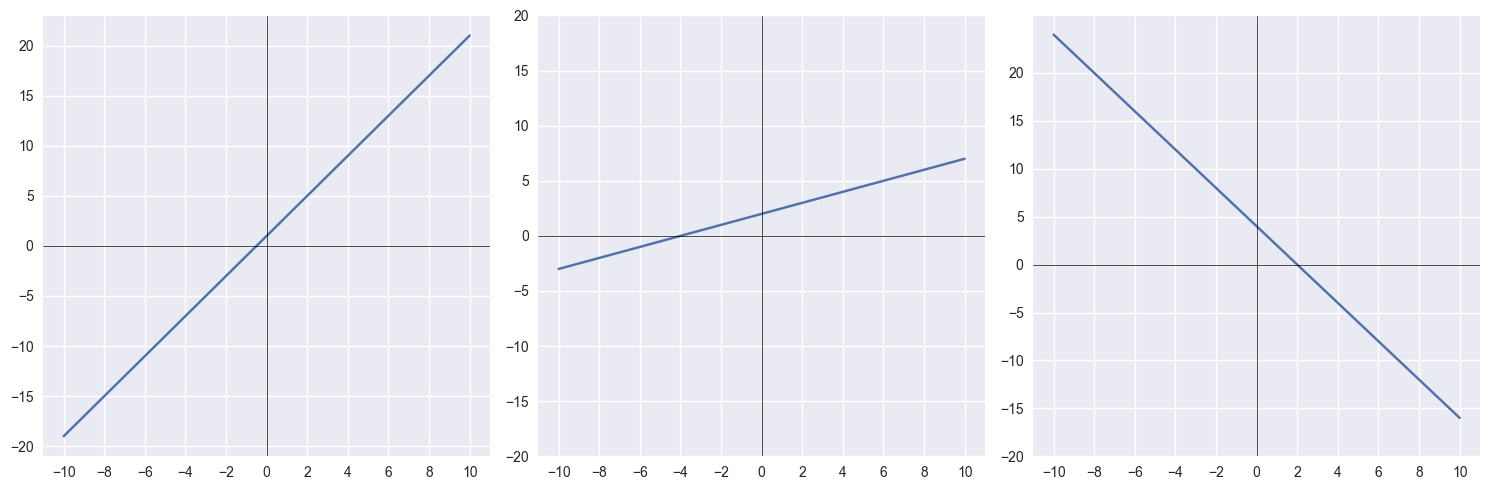

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

plt.style.use("seaborn-v0_8")  # 使用美观样式

x = np.linspace(-10, 10, 1000)
y1 = x * 2 + 1
y2 = x * (1 / 2) + 2
y3 = x * -2 + 4

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(x, y1)
axes[1].plot(x, y2)
axes[2].plot(x, y3)

# 为每个子图添加网格和坐标轴
for ax in axes:
    ax.grid(True)
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    ax.set_xticks(np.arange(-10, 11, 2))  # 设置刻度位置
    ax.set_yticks(np.arange(-20, 21, 5))  # 同时设置y轴刻度

fig.tight_layout()

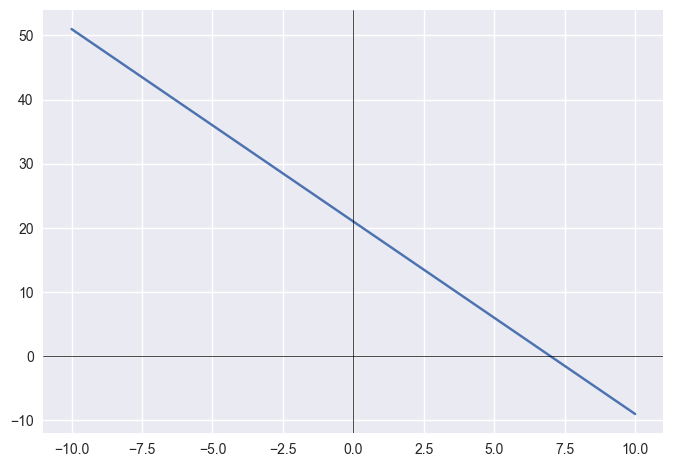

In [49]:
# 将 y1 y2 y3 线性组合并绘图
y4 = 1 * y1 + y2 * 2 + y3 * 3 + 4

plt.plot(x, y4)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)  # 没有引入非线性特征

In [45]:
def relu(x):
    return np.maximum(0, x)

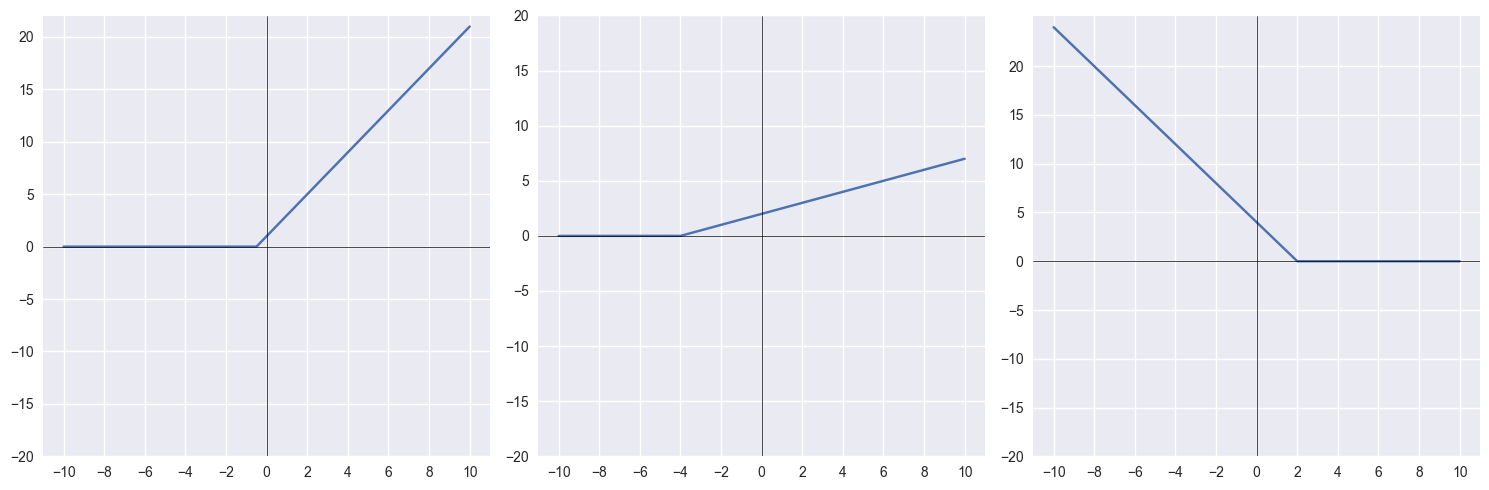

In [50]:
# 重新定义线性函数，避免重复应用ReLU
x = np.linspace(-10, 10, 1000)
y1_linear = x * 2 + 1
y2_linear = x * (1 / 2) + 2
y3_linear = x * -2 + 4

# 应用ReLU
y1 = relu(y1_linear)
y2 = relu(y2_linear)
y3 = relu(y3_linear)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(x, y1)
axes[1].plot(x, y2)
axes[2].plot(x, y3)

# 为每个子图添加网格和坐标轴
for ax in axes:
    ax.grid(True)
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    ax.set_xticks(np.arange(-10, 11, 2))  # 设置刻度位置
    ax.set_yticks(np.arange(-20, 21, 5))  # 同时设置y轴刻度

fig.tight_layout()

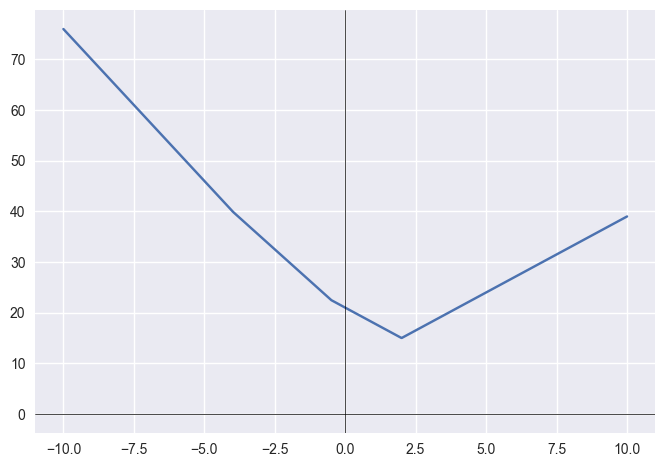

In [51]:
# 将 y1 y2 y3 线性组合并绘图
y4 = 1 * y1 + y2 * 2 + y3 * 3 + 4

plt.plot(x, y4)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)  # 引入非线性特征（三个转折点）

In [53]:
import pandas as pd
from typing import List


def createDataframe(student_data: List[List[int]]) -> pd.DataFrame:
    return pd.DataFrame(student_data, columns=["student_id", "age"])